In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
real_whole = pd.read_csv('../data/heart_attack/heart.csv')
real_whole.head()
real, test = train_test_split(real_whole, test_size = 0.2, random_state=42)

In [119]:
from sdv.metadata import SingleTableMetadata

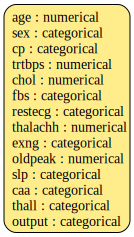

In [120]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real)
metadata.visualize()

In [166]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
dico = {}
for col in cat_cols:
    dico[col] = list(real_whole[col].unique())
dico

In [123]:
from sdv.single_table import GaussianCopulaSynthesizer

In [124]:
synthesizer = GaussianCopulaSynthesizer(metadata, default_distribution='norm')

In [4]:
synthesizer.fit(real)

NameError: name 'synthesizer' is not defined

In [126]:
synthetic_data = synthesizer.sample(num_rows=303)

In [5]:
real.shape

(242, 14)

In [3]:
real['output'].value_counts()

output
1    133
0    109
Name: count, dtype: int64

In [4]:
test['output'].value_counts()

output
1    32
0    29
Name: count, dtype: int64

In [128]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=real,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 1248.44it/s]|
Column Shapes Score: 92.8%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:01<00:00, 78.95it/s]|
Column Pair Trends Score: 45.74%

Overall Score (Average): 69.27%



In [129]:
quality_report.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

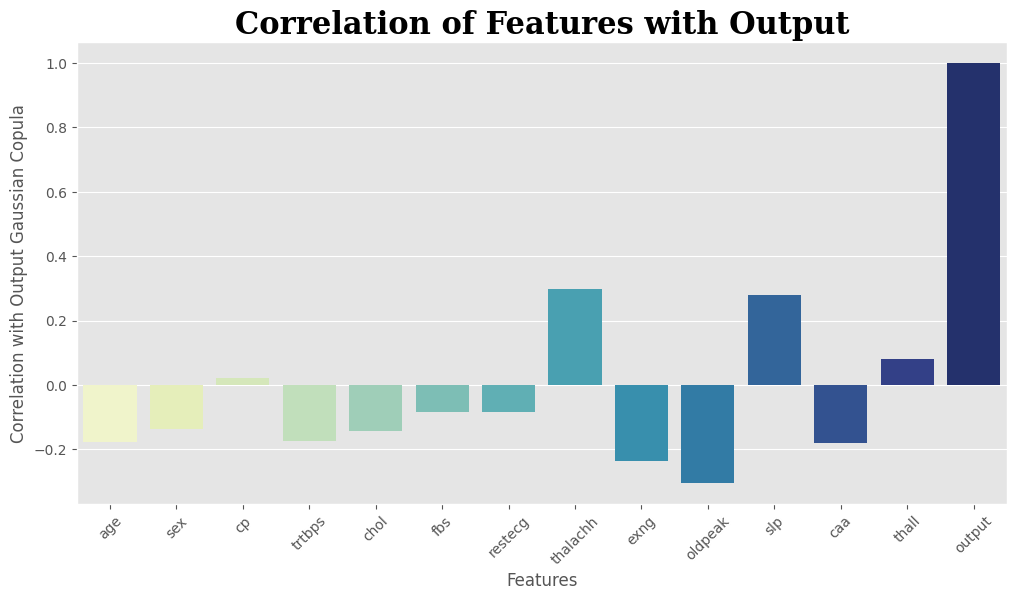

In [253]:
# Calculer la matrice de corrélation et la transformer pour Seaborn
corr_mat = synthetic_data.corr().stack().reset_index(name="correlation")

# Filtrer les lignes où 'level_0' est 'output'
filtered_corr_mat = corr_mat[corr_mat['level_0'] == 'output']

# Créer un graphique en barre pour la variable 'output'
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_corr_mat,
    x="level_1", y="correlation", palette="YlGnBu"
)
plt.xlabel("Features")
plt.ylabel("Correlation with Output Gaussian Copula")
plt.title("Correlation of Features with Output", fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
plt.xticks(rotation=45)
plt.show()

In [169]:
from sdv.single_table import CTGANSynthesizer

In [170]:
CTGANsynth = CTGANSynthesizer(metadata, verbose = True, epochs=500)

In [171]:
CTGANsynth.fit(real)

Gen. (-0.69) | Discrim. (-0.03): 100%|██████████| 500/500 [00:33<00:00, 14.98it/s]


In [172]:
CTGan_synth_data = CTGANsynth.sample(num_rows=303)

In [173]:
quality_report_CTG = evaluate_quality(
    real_data=real,
    synthetic_data=CTGan_synth_data,
    metadata=metadata)
quality_report_CTG.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 1442.37it/s]|
Column Shapes Score: 81.59%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:01<00:00, 85.21it/s]|
Column Pair Trends Score: 41.86%

Overall Score (Average): 61.73%



<Figure size 1200x1200 with 0 Axes>

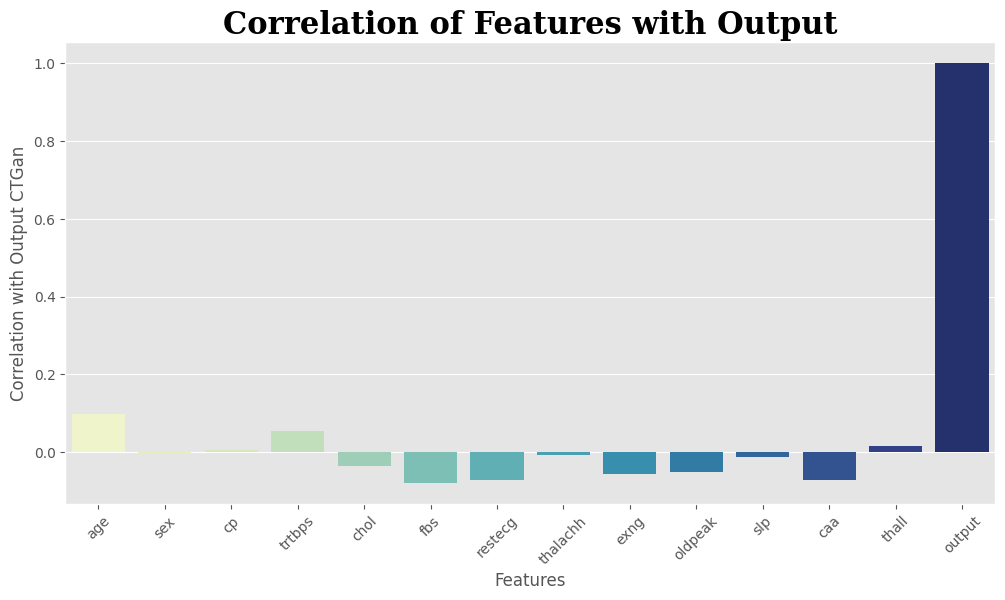

In [254]:
fig = plt.figure(figsize=(12,12))
corr_mat = CTGan_synth_data.corr().stack().reset_index(name="correlation")
# Filtrer les lignes où 'level_0' est 'output'
filtered_corr_mat = corr_mat[corr_mat['level_0'] == 'output']

# Créer un graphique en barre pour la variable 'output'
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_corr_mat,
    x="level_1", y="correlation", palette="YlGnBu"
)
plt.xlabel("Features")
plt.ylabel("Correlation with Output CTGan")
plt.title("Correlation of Features with Output", fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
plt.xticks(rotation=45)
plt.show()

In [176]:
from sdv.single_table import TVAESynthesizer

TV_synth = TVAESynthesizer(metadata, epochs=500)
TV_synth.fit(real)
TV_synth_data = TV_synth.sample(num_rows=303)

In [177]:
quality_report_TV = evaluate_quality(
    real_data=real,
    synthetic_data=TV_synth_data,
    metadata=metadata)
quality_report_TV.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 1645.61it/s]|
Column Shapes Score: 87.68%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:01<00:00, 80.16it/s]|
Column Pair Trends Score: 41.52%

Overall Score (Average): 64.6%



<Figure size 1200x1200 with 0 Axes>

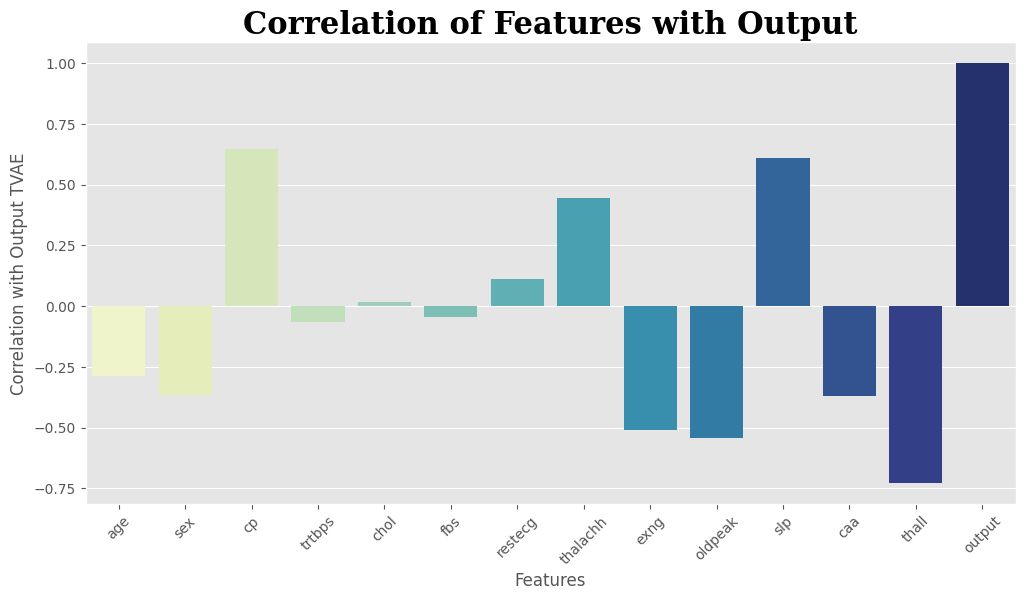

In [255]:
fig = plt.figure(figsize=(12,12))
corr_mat = TV_synth_data.corr().stack().reset_index(name="correlation")

# Filtrer les lignes où 'level_0' est 'output'
filtered_corr_mat = corr_mat[corr_mat['level_0'] == 'output']

# Créer un graphique en barre pour la variable 'output'
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_corr_mat,
    x="level_1", y="correlation", palette="YlGnBu"
)
plt.xlabel("Features")
plt.ylabel("Correlation with Output TVAE")
plt.title("Correlation of Features with Output", fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
plt.xticks(rotation=45)
plt.show()

In [179]:
GC_data = synthetic_data
CT_data = CTGan_synth_data
TV_data = TV_synth_data

In [180]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [181]:
GC_data[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,53.679868,9.466208,29.0,47.0,54.0,60.0,77.0
trtbps,303.0,131.765677,16.922140,94.0,120.0,133.0,144.0,172.0
chol,303.0,246.026403,48.685359,131.0,212.5,245.0,282.5,391.0
thalachh,303.0,151.485149,22.645094,88.0,136.5,153.0,166.5,202.0
oldpeak,303.0,1.187789,0.953705,0.0,0.4,1.1,1.8,3.7


In [182]:
TV_data[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,57.402640,7.619441,34.0,53.0,58.0,63.0,75.0
trtbps,303.0,128.033003,11.494264,95.0,121.0,128.0,135.0,169.0
chol,303.0,234.287129,39.792925,152.0,206.0,230.0,260.0,379.0
thalachh,303.0,152.970297,18.980186,90.0,143.0,157.0,167.0,192.0
oldpeak,303.0,0.877888,0.949628,0.0,0.1,0.6,1.4,5.4


In [183]:
CT_data[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,64.557756,9.342408,37.0,58.0,65.0,72.5,77.0
trtbps,303.0,112.557756,17.342741,94.0,96.0,110.0,124.0,191.0
chol,303.0,275.293729,62.147945,131.0,235.0,277.0,317.0,439.0
thalachh,303.0,154.508251,26.830578,88.0,137.0,154.0,174.0,202.0
oldpeak,303.0,1.007261,1.046793,0.0,0.2,0.6,1.7,5.4


In [256]:
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [185]:
real1 = real
test1 = test

In [219]:
df = pd.concat([real, test])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [220]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
132,-0.962963,-0.50,0.866142,0.276923,-0.500,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
202,0.222222,1.00,0.472441,-1.292308,0.000,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
196,-0.666667,1.00,-0.141732,-0.184615,1.750,True,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
75,0.000000,0.25,0.157480,0.246154,0.375,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
176,0.370370,-0.65,-0.157480,0.215385,0.375,True,True,False,True,False,...,False,False,True,True,False,False,True,False,False,True


In [222]:
ind_train = list(real.index)
ind_test = list(test.index)

In [224]:
X_real_train = X.loc[ind_train]
y_real_train = y.loc[ind_train]
X_real_test = X.loc[ind_test]
y_real_test = y.loc[ind_test]

In [225]:
GC_data1 = GC_data
# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
GC_data1 = pd.get_dummies(GC_data1, columns = cat_cols, drop_first = True)

# defining the features and target
X_GC = GC_data1.drop(['output'],axis=1)
y_GC = GC_data1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X_GC[con_cols] = scaler.fit_transform(X_GC[con_cols])
print("The first 5 rows of X are")
X_GC.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.230769,-0.541667,-0.228571,-0.133333,-0.071429,True,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,-0.461538,-0.750000,0.585714,0.700000,-0.428571,True,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True
2,0.153846,0.166667,0.900000,-1.333333,-0.571429,False,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
3,-0.769231,-1.208333,-0.828571,0.000000,0.000000,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
4,-0.769231,0.208333,-0.200000,0.300000,0.214286,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [226]:
TV_data1 = TV_data
# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
TV_data1 = pd.get_dummies(TV_data1, columns = cat_cols, drop_first = True)

# defining the features and target
X_TV = TV_data1.drop(['output'],axis=1)
y_TV = TV_data1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X_TV[con_cols] = scaler.fit_transform(X_TV[con_cols])
print("The first 5 rows of X are")
X_TV.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,cp_1,cp_2,fbs_1,restecg_1,slp_2,thall_3
0,-0.4,-0.214286,0.537037,-0.041667,0.384615,True,False,False,False,False,False,False,False,True,False
1,0.9,0.071429,-0.222222,-0.291667,0.000000,False,False,False,False,False,True,False,False,False,False
2,-0.1,1.214286,-0.425926,0.625000,-0.076923,True,False,False,False,False,True,False,True,True,False
3,0.1,-1.071429,0.166667,-1.041667,0.692308,True,False,True,False,False,False,False,True,False,True
4,-0.1,-0.357143,0.037037,-0.375000,1.461538,True,False,False,True,False,False,False,False,False,True


In [227]:
CT_data1 = CT_data
# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
CT_data1 = pd.get_dummies(CT_data1, columns = cat_cols, drop_first = True)

# defining the features and target
X_CT = CT_data1.drop(['output'],axis=1)
y_CT = CT_data1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X_CT[con_cols] = scaler.fit_transform(X_CT[con_cols])
print("The first 5 rows of X are")
X_CT.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_2,thall_3
0,-0.827586,1.107143,0.341463,-0.405405,-0.400000,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,0.206897,-0.571429,-0.682927,-0.513514,0.733333,False,True,True,False,False,...,False,False,True,False,False,False,False,True,False,True
2,0.620690,1.178571,-1.682927,0.702703,0.800000,True,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
3,0.275862,1.357143,0.378049,0.783784,0.000000,True,True,True,False,False,...,False,False,False,False,False,False,False,True,False,True
4,-0.689655,0.250000,-0.329268,0.945946,1.000000,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True


In [228]:
X_TV.shape

(303, 15)

In [229]:
X_GC.shape

(303, 22)

In [230]:
X_CT.shape

(303, 21)

In [231]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
dicoCT = {}
for col in cat_cols:
    dicoCT[col] = list(CT_data[col].unique())
dicoCT

{'sex': [1, 0],
 'exng': [0, 1],
 'caa': [0, 1, 3, 2, 4],
 'cp': [0, 3, 2, 1],
 'fbs': [1, 0],
 'restecg': [0, 1, 2],
 'slp': [2, 1, 0],
 'thall': [2, 3, 1]}

In [232]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
dicoGC = {}
for col in cat_cols:
    dicoGC[col] = list(GC_data[col].unique())
dicoGC

{'sex': [1, 0],
 'exng': [1, 0],
 'caa': [1, 0, 2, 3, 4],
 'cp': [2, 3, 0, 1],
 'fbs': [0, 1],
 'restecg': [0, 1, 2],
 'slp': [0, 2, 1],
 'thall': [3, 2, 0, 1]}

In [233]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
dicoTV = {}
for col in cat_cols:
    dicoTV[col] = list(TV_data[col].unique())
dicoTV

{'sex': [1, 0],
 'exng': [0, 1],
 'caa': [0, 1, 2],
 'cp': [0, 2, 1],
 'fbs': [0, 1],
 'restecg': [0, 1],
 'slp': [2, 1],
 'thall': [2, 3]}

In [234]:
dico

{'sex': [1, 0],
 'exng': [0, 1],
 'caa': [0, 2, 1, 3, 4],
 'cp': [3, 2, 1, 0],
 'fbs': [1, 0],
 'restecg': [0, 1, 2],
 'slp': [0, 2, 1],
 'thall': [1, 2, 3, 0]}

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


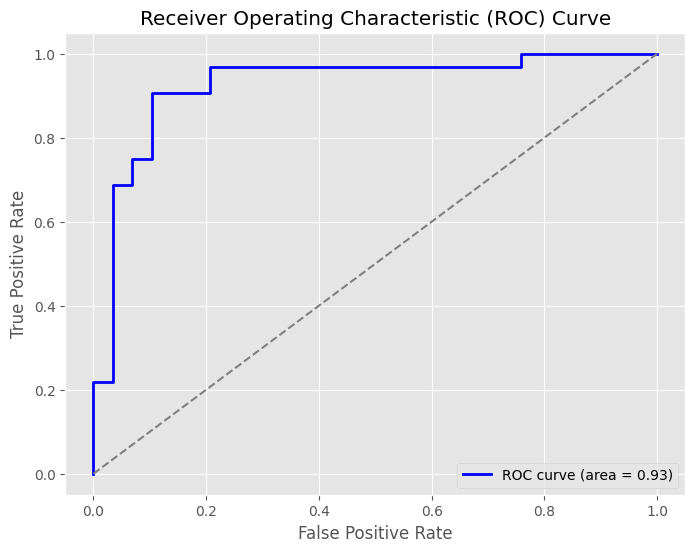

In [270]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_real_train, y_real_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_real_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_real_test, y_pred))

# Obtenir les scores de décision pour la courbe ROC
y_scores = searcher.decision_function(X_real_test)

# Calculer la courbe ROC et l'AUC
fpr_real, tpr_real, thresholds_real = roc_curve(y_real_test, y_scores)
roc_auc_real = roc_auc_score(y_real_test, y_scores)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_real, tpr_real, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_real:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [237]:
X_real_test[list(X_GC.columns)].head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
179,0.148148,1.0,0.566929,-1.261538,-0.1250,True,True,True,False,False,...,False,False,False,False,False,True,False,True,False,False
228,0.296296,2.0,0.755906,0.184615,-0.3750,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
111,0.148148,1.0,-1.795276,0.615385,-0.3750,True,False,True,False,False,...,True,False,True,True,False,False,True,False,False,True
246,0.074074,0.2,2.661417,-0.092308,0.6875,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
60,1.185185,-1.0,0.393701,-0.707692,-0.5000,False,False,True,False,False,...,True,False,True,False,False,False,True,False,True,False


The best params are : {'C': 5, 'gamma': 0.01}
The best score is   : 0.7095081967213115
The test accuracy score of SVM after hyper-parameter tuning is  0.819672131147541


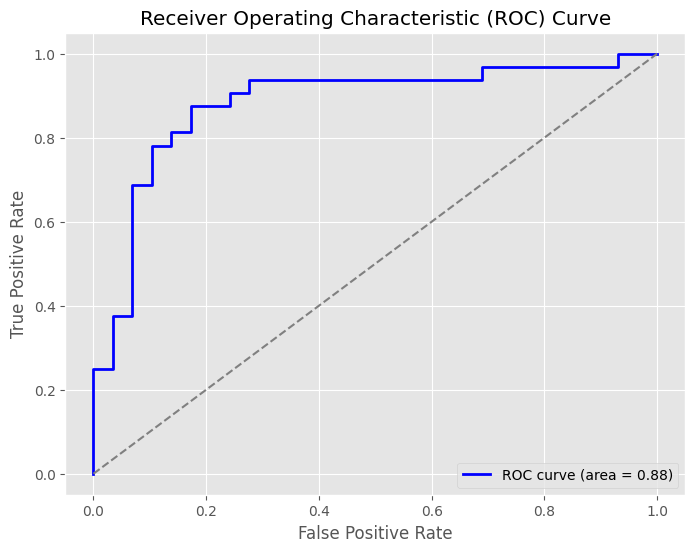

In [269]:
# instantiating the object
svm_GC = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_GC, parameters)

# fitting the object
searcher.fit(X_GC, y_GC)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_GC = searcher.predict(X_real_test[list(X_GC.columns)])

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_real_test, y_pred_GC))

# Obtenir les scores de décision pour la courbe ROC
y_scores_GC = searcher.decision_function(X_real_test[list(X_GC.columns)])

# Calculer la courbe ROC et l'AUC
fpr_GC, tpr_GC, thresholds_GC = roc_curve(y_real_test, y_scores_GC)
roc_auc_GC = roc_auc_score(y_real_test, y_scores_GC)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_GC, tpr_GC, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_GC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The best params are : {'C': 1, 'gamma': 1}
The best score is   : 0.6633879781420764
The test accuracy score of SVM after hyper-parameter tuning is  0.47540983606557374


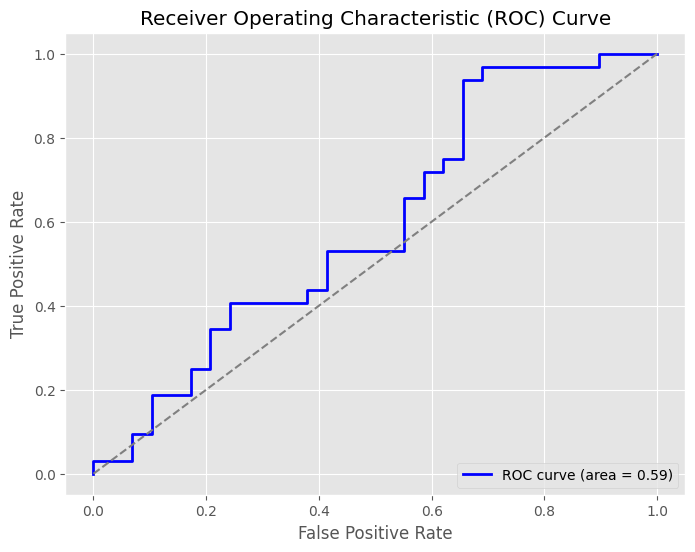

In [268]:
# instantiating the object
svm_CT = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_CT, parameters)

# fitting the object
searcher.fit(X_CT, y_CT)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_CT = searcher.predict(X_real_test[list(X_CT.columns)])

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_real_test, y_pred_CT))

# Obtenir les scores de décision pour la courbe ROC
y_scores_CT = searcher.decision_function(X_real_test[list(X_CT.columns)])

# Calculer la courbe ROC et l'AUC
fpr_CT, tpr_CT, thresholds_CT = roc_curve(y_real_test, y_scores_CT)
roc_auc_CT = roc_auc_score(y_real_test, y_scores_CT)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_CT, tpr_CT, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_CT:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The best params are : {'C': 1, 'gamma': 0.05}
The best score is   : 0.9142076502732241
The test accuracy score of SVM after hyper-parameter tuning is  0.8524590163934426


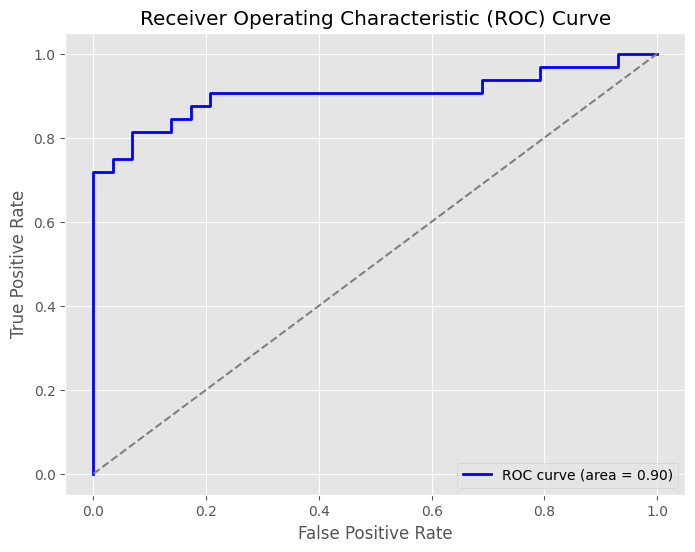

In [267]:
# instantiating the object
svm_TV = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm_TV, parameters)

# fitting the object
searcher.fit(X_TV, y_TV)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_TV = searcher.predict(X_real_test[list(X_TV.columns)])

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_real_test, y_pred_TV))

# Obtenir les scores de décision pour la courbe ROC
y_scores_TV = searcher.decision_function(X_real_test[list(X_TV.columns)])

# Calculer la courbe ROC et l'AUC
fpr_TV, tpr_TV, thresholds_TV = roc_curve(y_real_test, y_scores_TV)
roc_auc_TV = roc_auc_score(y_real_test, y_scores_TV)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_TV, tpr_TV, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_TV:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

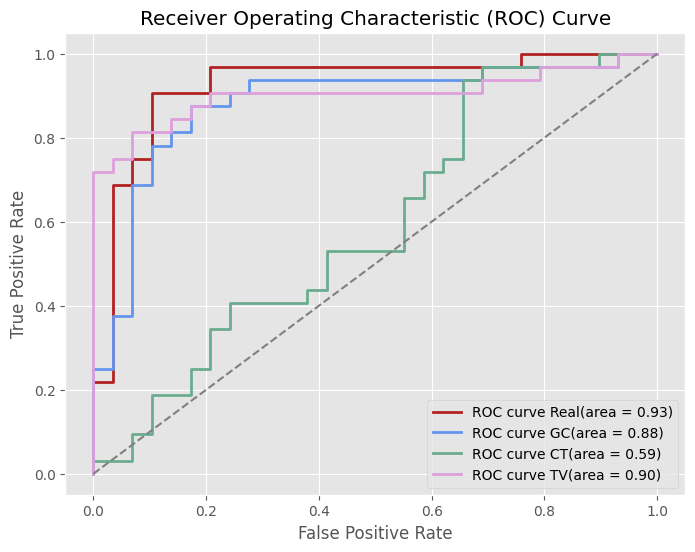

In [271]:
# Tracer la courbe ROC

color_palette = ["firebrick","cornflowerblue","#6aac90","plum","sandybrown"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_real, tpr_real, color="firebrick", lw=2, label=f'ROC curve Real(area = {roc_auc_real:.2f})')
plt.plot(fpr_GC, tpr_GC, color="cornflowerblue", lw=2, label=f'ROC curve GC(area = {roc_auc_GC:.2f})')
plt.plot(fpr_CT, tpr_CT, color="#6aac90", lw=2, label=f'ROC curve CT(area = {roc_auc_CT:.2f})')
plt.plot(fpr_TV, tpr_TV, color="plum", lw=2, label=f'ROC curve TV(area = {roc_auc_TV:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()